In [27]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Labling Time Series, Exporting Graphics (zimoma)

Use snb-data-zimoma-en-all-20170502_1430.csv to complete the following exercise:

Add the following information to the time series plot of the 1TGT data:
- 1973-11: Oil Price Shock

- 1991-01 – 1993-12: Recession in Switzerland

- 2009-01 – 2009-12: Recession in Switzerland

- 2008-09: Lehman-Brothers collapse

- 2011-08: Introduction of CHF/EUR floor

- 2015-01: Removal of CHF/EUR floor

(Matplotlib hints: http://matplotlib.org/users/annotations.html, axhspan )

Export your graphics, and put together a PowerPoint (or equivalent) presentation to highlight the effect of the events above on the money-market rates. Try with different typefaces, remember the grid when laying the result out.

In [28]:
df = pd.read_csv('snb-data-zimoma-en-all-20170502_1430.csv')
df

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.00000
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN
...,...,...,...
5979,2017-04,12M,-0.49160
5980,2017-04,3M1,1.17233
5981,2017-04,3M2,0.00243
5982,2017-04,3M3,0.32525


In [29]:
# The natural order of duration is ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
pd.unique(df['D0'])

array(['SARON', '1TGT', 'EG3M', '1M', '3M0', '6M', '12M', '3M1', '3M2',
       '3M3', '3M4'], dtype=object)

In [31]:
# line chart of 1TGT series

import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

df['Date'] = pd.to_datetime(df['Date'])

tdf = df.pivot(index='Date', columns='D0', values='Value').reset_index()
p = figure(x_axis_type="datetime")
p.line(x=tdf['Date'], y=tdf['1TGT'])
show(p)

Loading BokehJS ...

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
tdf = df.set_index(['Date', 'D0']).unstack()['Value']
term_order = ['1TGT']
tdf = tdf[term_order]
tdf.head()

D0,1TGT
Date,
1972-01-01,0.000
1972-02-01,0.000
1972-03-01,0.125
1972-04-01,0.250
1972-05-01,1.500


Text(2004-01-01 00:00:00, 12.5, 'Recession in CH')

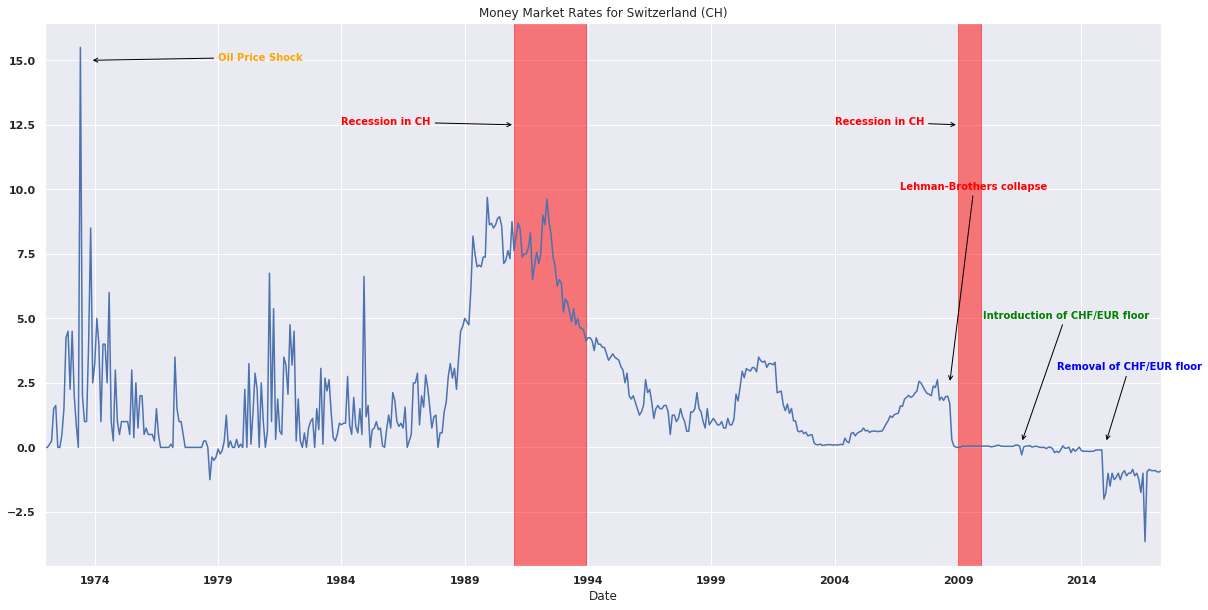

In [143]:
#1973-11: Oil Price Shock
#1991-01 – 1993-12: Recession in Switzerland
#2009-01 – 2009-12: Recession in Switzerland
#2008-09: Lehman-Brothers collapse
#2011-08: Introduction of CHF/EUR floor
#2015-01: Removal of CHF/EUR floor


ax = tdf.plot(figsize=(20,10),title='Money Market Rates for Switzerland (CH)',legend=False) #the main plot


#annotation 1
oilpriceshock_s = pd.to_datetime('1973-11')
oilpriceshock_e = pd.to_datetime('1979-01') 

ax.annotate("Oil Price Shock",
            xy=(oilpriceshock_s, 15), xycoords='data',
            xytext=(oilpriceshock_e, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='orange',size=10
            )

#annotation 2
collapse_s = pd.to_datetime('2008-09')
collapse_e = pd.to_datetime('2006-09')

ax.annotate("Lehman-Brothers collapse",
            xy=(collapse_s, 2.5), xycoords='data',
            xytext=(collapse_e, 10), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

#annotation 3
floor_s = pd.to_datetime('2011-08')
floor_e = pd.to_datetime('2010-01')

ax.annotate("Introduction of CHF/EUR floor",
            xy=(floor_s, 0.2), xycoords='data',
            xytext=(floor_e, 5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='green',size=10
            )

#annotation 4
floor_end_s = pd.to_datetime('2015-01')
floor_end_e = pd.to_datetime('2013-01')

ax.annotate("Removal of CHF/EUR floor",
            xy=(floor_end_s, 0.2), xycoords='data',
            xytext=(floor_end_e, 3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='blue',size=10
            )

#annotation 5 
recess_s = pd.to_datetime('1991-01')
recess_e = pd.to_datetime('1993-12')
a=pd.to_datetime('1984')
plt.axvspan(recess_s, recess_e, color='red', alpha=0.5)

ax.annotate("Recession in CH",
            xy=(recess_s, 12.5), xycoords='data',
            xytext=(a, 12.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

#annotation 6  #2009-01 – 2009-12: Recession in Switzerland
recess_s2 = pd.to_datetime('2009-01')
recess_e2 = pd.to_datetime('2009-12')
b=pd.to_datetime('2004')
plt.axvspan(recess_s2, recess_e2, color='red', alpha=0.5)

ax.annotate("Recession in CH",
            xy=(recess_s2, 12.5), xycoords='data',
            xytext=(b, 12.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

# Labling Scatterplot (mpg.csv)

Use mpg.csv to complete the following exercise:

Yesterday, you made a plots of displacement vs. highway fuel efficiency for all cars in the data set. Improve these plots by emphasizing and annotating the cars with the best/worst hwy efficiency.

- One plot with all cars; emphasize/annotate the cars with the best and worst hwy efficiency

- A plot faceted by class with the best and worst hwy efficiency in the class emphasized/annotated

In [144]:
df2 = pd.read_csv('mpg.csv')

In [145]:
df2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


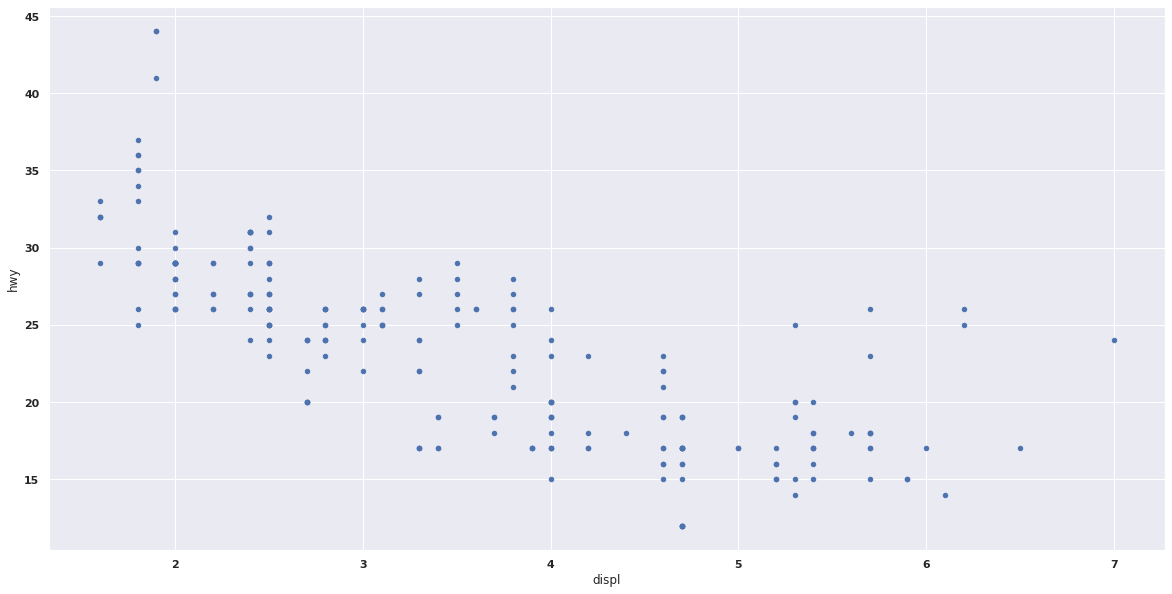

In [153]:
ax = df2.plot(x='displ',y='hwy',figsize=(20,10),legend=False,kind='scatter') #the main plot